# Pathway Analysis

### Load imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bioservices import KEGG

import sys

source_dir = '../'
sys.path.append(source_dir)

from functions.filter_and_clean_dataframe import filter_and_clean_dataframe

kegg = KEGG()

# Set figure styles
sns.set_style("whitegrid")

# Set default color for text and lines to black
sns.set(rc={"axes.facecolor": "white", "axes.edgecolor": "black", "grid.color": "black", 
            "text.color": "black", "xtick.color": "black", "ytick.color": "black", 
            "axes.labelcolor": "black", "figure.facecolor": "white"})


### Load data

In [2]:
intracellular_df = pd.read_csv('../processed_data/intra_gcms.csv', index_col=0)
extracellular_1_df = pd.read_csv('../processed_data/extra_gcms_1.csv', index_col=0)
extracellular_4_df = pd.read_csv('../processed_data/extra_gcms_4.csv', index_col=0)
intracellular_pos_df = pd.read_csv('../processed_data/intra_lcms_pos.csv', index_col=0)
intracellular_neg_df = pd.read_csv('../processed_data/intra_lcms_neg.csv', index_col=0)
extracellular_pos_df = pd.read_csv('../processed_data/extra_lcms_pos.csv', index_col=0)
extracellular_neg_df = pd.read_csv('../processed_data/extra_lcms_neg.csv', index_col=0)

print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (25, 320)
extracellular_1_df has shape (26, 247)
extracellular_4_df has shape (53, 279)
intracellular_pos_df has shape (27, 721)
intracellular_neg_df has shape (27, 665)
extracellular_pos_df has shape (80, 520)
extracellular_neg_df has shape (80, 661)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Adipic acid,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,...,Unknown 220,Unknown 221,Unknown 222,Unknown 223,Unknown 224,Unknown 225,Unknown 226,Unknown 227,Unknown 228,Unknown 229
Tags,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_switchgrass_pvhg6_early_stat_1,206675.073240236,265628.2073572,398155.546965357,461693.997122307,553917.012625364,0.0,39884.14605205,1751763.14357969,1766960.21177728,98325.766858502,...,4.299281e+05,49456.507927,371788.053410,234280.995486,5832.703213,1.645217e+06,351925.677818,24385.393103,217630.729539,198363.596018
in_switchgrass_pvhg6_early_stat_3,341996.103780714,358143.914807286,448290.918266103,496714.999168787,638854.84035566,0.0,84423.2394990384,2040960.80587233,2032543.136365,115405.400973157,...,5.233400e+05,54438.918937,417617.364083,370183.713935,30622.454946,2.054061e+06,492993.409911,61659.348813,214347.074793,200325.541072
in_switchgrass_pvhg6_early_stat_2,263361.804510689,316901.937516122,382225.895834572,549619.810167144,802743.275250288,0.0,65523.7689777048,2144767.05673166,2175518.31265378,157969.941265746,...,5.223632e+05,78126.743977,411800.779492,501043.347306,528.570981,2.814759e+06,305358.590677,0.000000,267134.158139,243310.544402
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,0.0,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,...,1.094674e+06,68781.500733,389899.251774,53068.346347,41841.431914,4.591185e+05,0.000000,0.000000,0.000000,0.000000


### Define a list of labels related to early stationary phase wildtype

In [3]:
intracellular_labels = list(intracellular_df.index)

# remove 'Tags' row
labels_to_keep = [label for label in intracellular_labels if label != 'Tags']

# remove the PVHG strain rows to keep only the wild type data
labels_to_keep = [label for label in labels_to_keep if 'pvhg6' not in label]

# make a list of corresponding labels for the extracellular data
extra_labels_to_keep = [label.replace('in_', 'ex_') for label in labels_to_keep]

display(labels_to_keep)

extra_labels_to_keep

['in_switchgrass_wt_early_stat_1',
 'in_switchgrass_wt_early_stat_2',
 'in_switchgrass_wt_early_stat_3',
 'in_pvhg_wt_early_stat_1a',
 'in_pvhg_wt_early_stat_2a',
 'in_pvhg_wt_early_stat_3a',
 'in_glc_wt_early_stat_1',
 'in_glc_wt_early_stat_2',
 'in_glc_wt_early_stat_3',
 'in_glc/phe_wt_early_stat_1',
 'in_glc/phe_wt_early_stat_2',
 'in_glc/phe_wt_early_stat_3',
 'in_phe_wt_early_stat_1',
 'in_phe_wt_early_stat_2',
 'in_phe_wt_early_stat_3',
 'in_pvhg_wt_early_stat_1b',
 'in_pvhg_wt_early_stat_2b',
 'in_pvhg_wt_early_stat_3b']

['ex_switchgrass_wt_early_stat_1',
 'ex_switchgrass_wt_early_stat_2',
 'ex_switchgrass_wt_early_stat_3',
 'ex_pvhg_wt_early_stat_1a',
 'ex_pvhg_wt_early_stat_2a',
 'ex_pvhg_wt_early_stat_3a',
 'ex_glc_wt_early_stat_1',
 'ex_glc_wt_early_stat_2',
 'ex_glc_wt_early_stat_3',
 'ex_glc/phe_wt_early_stat_1',
 'ex_glc/phe_wt_early_stat_2',
 'ex_glc/phe_wt_early_stat_3',
 'ex_phe_wt_early_stat_1',
 'ex_phe_wt_early_stat_2',
 'ex_phe_wt_early_stat_3',
 'ex_pvhg_wt_early_stat_1b',
 'ex_pvhg_wt_early_stat_2b',
 'ex_pvhg_wt_early_stat_3b']

### Remove the rows that are not related to early stationary phase wildtype

In [4]:
intracellular_df = filter_and_clean_dataframe(intracellular_df, labels_to_keep, filter_unknowns=True)
extracellular_1_df = filter_and_clean_dataframe(extracellular_1_df, extra_labels_to_keep, filter_unknowns=True)
extracellular_4_df = filter_and_clean_dataframe(extracellular_4_df, extra_labels_to_keep, filter_unknowns=True)
intracellular_pos_df = filter_and_clean_dataframe(intracellular_pos_df, labels_to_keep, filter_unknowns=True)
intracellular_neg_df = filter_and_clean_dataframe(intracellular_neg_df, labels_to_keep, filter_unknowns=True)
extracellular_pos_df = filter_and_clean_dataframe(extracellular_pos_df, extra_labels_to_keep, filter_unknowns=True)
extracellular_neg_df = filter_and_clean_dataframe(extracellular_neg_df, extra_labels_to_keep, filter_unknowns=True)


print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (18, 84)
extracellular_1_df has shape (3, 45)
extracellular_4_df has shape (12, 40)
intracellular_pos_df has shape (18, 209)
intracellular_neg_df has shape (18, 184)
extracellular_pos_df has shape (15, 59)
extracellular_neg_df has shape (15, 76)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,...,L-methionine sulfoxide,Maltotriitol,Maltotriose,Melibiose,O-phospho-L-serine,Phlorobenzophenone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,317216.41938428,...,57650.95129084,0.0,197109.09808694,154515.482330361,912327.96567334,54886.784330598,53255.6038503064,1567848.0586232,79592.744504499,41592.877786195
in_switchgrass_wt_early_stat_2,227309.55760657,213583.36610502,312837.42938902,575822.106374466,510742.474927335,30589.6316662972,1362157.06455961,2078919.83564604,85094.117589131,336929.76297088,...,33682.73078276,0.0,132211.94520795,178537.388821497,546466.68582922,13966.873772048999,54527.47671824,942871.57758861,101591.311751851,125701.00546245
in_switchgrass_wt_early_stat_3,398074.885557321,211939.49668843,296180.63097077,819996.231224398,618736.890582027,43765.31575552,1604466.57278453,2008970.44657791,110175.160063256,515591.82996428,...,68076.39291200001,19900.1574488,130384.73448493,92173.058229043,656821.37515376,26902.583198962,56933.25212629,1269753.69603953,74901.178091305,93064.52323487
in_pvhg_wt_early_stat_1a,15162280.8838296,415540.715236955,271752.376247778,72902.08496758,594252.444514168,30943.57955535,2485640.0470855,1821222.8634703,228090.297121264,220103.450019034,...,65791.95675730999,0.0,46002.15191532,45797.01792878,244917.939423229,30514.717408853998,41711.03618778,1191269.79205348,74966.129693052,115508.27512833
in_pvhg_wt_early_stat_2a,18852341.7192045,414698.828302764,282297.43522253,2048534.51426727,631378.749461895,34596.4930274828,3083610.04949007,2065605.09371182,267275.475767908,440350.185467694,...,192791.27122674,87602.9049696,0.0,152281.830320128,42215.306175899,38377.218959317994,46684.49842109,1857530.45155866,105883.846141951,0.0


### Define a function to make average and standard deviation for different conditions

In [5]:
# Define a function to make average and standard deviation for different conditions
def group_and_calculate_stats(df):
    # Convert all columns to numeric, coercing errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Extract the prefix of each row name by removing the last part after the '_'
    prefixes = df.index.str.split('_').str[:-1].str.join('_')

    # Create a new DataFrame to hold the results
    result = pd.DataFrame()

    # Loop through each unique prefix (condition)
    for prefix in prefixes.unique():
        # Select the rows corresponding to the current prefix
        subset = df[prefixes == prefix]

        # Calculate the average and standard deviation
        avg = subset.mean()
        std = subset.std()

        # Rename the rows
        avg.name = f'{prefix}_avg'
        std.name = f'{prefix}_std'

        # Append to the result DataFrame
        result = pd.concat([result, avg.to_frame().T, std.to_frame().T])

    return result

# intracellular_df = group_and_calculate_stats(intracellular_df)

# intracellular_df

### Find average and standard deviations for each condition in each dataframe

In [6]:
# convert the dataframes to show average and standard deviation for each condition
intracellular_df = group_and_calculate_stats(intracellular_df)
extracellular_1_df = group_and_calculate_stats(extracellular_1_df)
extracellular_4_df = group_and_calculate_stats(extracellular_4_df)
intracellular_pos_df = group_and_calculate_stats(intracellular_pos_df)
intracellular_neg_df = group_and_calculate_stats(intracellular_neg_df)
extracellular_pos_df = group_and_calculate_stats(extracellular_pos_df)
extracellular_neg_df = group_and_calculate_stats(extracellular_neg_df)

intracellular_pos_df

,1-Aminocyclopropane-1-carboxylic acid,1-Methyladenine,2-Aminoadipic acid,2-Aminopurine,2'-Deoxyadenosine 5'-monophosphate (dAMP),2'-Deoxyadenosine-5'-diphosphate (dADP),2'-Deoxycytidine 5'-diphosphate (dCDP),2'-Deoxycytidine 5'-Monophosphate,2-Hydroxycinnamaldehyde,4-Acetamidobutanoic acid,...,DL-Lysine lactam,Fenugreekine,Furfural,Glutarylglycine,Iminodiacetic acid,Isoxazolin-5-one,Nitrobenzene,N-Methylglutamine,N-Methylolacrylamide,Oxazolidinone
in_switchgrass_wt_early_stat_avg,7.801564e+07,6.717424e+05,2.486828e+06,1.625791e+07,4.941581e+05,6.814056e+05,5.526167e+05,4.248158e+05,1.931479e+07,2.198105e+06,...,4.374084e+06,1.310590e+07,1.110449e+07,1.785373e+05,1.403953e+07,418241.417805,719575.017364,9.616617e+06,2.456356e+06,4.235576e+06
in_switchgrass_wt_early_stat_std,3.810653e+06,2.668879e+05,7.366886e+05,2.348928e+06,3.306024e+04,1.563304e+05,1.538021e+05,8.791353e+04,3.715527e+06,5.331198e+05,...,3.509843e+05,1.438588e+06,8.415780e+05,7.990663e+04,3.984234e+06,52531.377212,54049.123882,1.158250e+06,4.944683e+05,4.204883e+05
in_pvhg_wt_early_stat_avg,6.179982e+07,6.829075e+06,1.698569e+06,1.935850e+07,1.345889e+06,1.779068e+06,1.936476e+06,1.969032e+06,5.936830e+07,2.833463e+05,...,3.020743e+06,1.140923e+07,1.014182e+07,1.664788e+07,1.094647e+08,633962.206049,871276.767080,1.099558e+07,1.671156e+06,1.926320e+07
in_pvhg_wt_early_stat_std,4.388902e+06,2.568564e+06,5.854200e+05,7.410513e+06,4.397614e+05,3.729994e+05,1.605557e+06,6.922338e+05,2.279737e+07,5.857422e+04,...,7.689811e+05,1.560012e+06,1.436303e+06,2.911060e+06,4.217672e+07,59260.043812,257424.418974,1.298742e+06,4.462745e+05,6.666395e+06
in_glc_wt_early_stat_avg,5.314832e+07,3.736105e+06,2.398607e+05,1.645786e+07,3.276965e+05,5.076226e+05,1.647231e+05,4.613755e+05,5.767318e+06,1.190644e+05,...,1.314089e+06,1.712355e+07,4.393685e+06,7.375609e+04,1.055656e+07,447601.452270,681599.110007,3.122163e+06,8.734050e+05,2.611300e+06
in_glc_wt_early_stat_std,4.554257e+07,3.516190e+06,1.335957e+05,1.847013e+06,2.753775e+05,4.408686e+05,1.726435e+05,3.936050e+05,4.894657e+06,4.536144e+04,...,8.269088e+05,2.180245e+07,3.837232e+06,5.795522e+04,9.147199e+06,366544.589553,704162.354530,2.628107e+06,7.218376e+05,2.195145e+06
in_glc/phe_wt_early_stat_avg,7.989533e+07,8.627920e+06,9.309130e+05,1.197021e+07,4.243781e+05,4.785789e+05,2.342925e+05,7.598403e+05,7.014872e+07,1.860024e+05,...,2.461676e+06,1.189340e+07,6.906378e+06,1.391201e+05,1.921628e+07,766149.736076,731801.025527,5.751889e+06,6.821874e+05,5.407975e+06
in_glc/phe_wt_early_stat_std,2.861725e+06,5.336941e+05,4.001736e+05,2.037846e+06,1.062883e+05,4.483163e+04,1.904946e+05,1.245016e+05,7.188615e+06,8.479866e+04,...,2.749073e+05,1.389190e+06,7.025232e+05,1.026235e+05,1.184754e+06,73108.318190,56433.547240,9.270985e+05,6.247884e+04,6.314954e+05
in_phe_wt_early_stat_avg,6.723111e+07,4.334804e+06,1.847415e+06,1.517938e+07,2.440054e+05,1.866885e+05,5.069735e+04,7.186133e+05,2.353604e+07,1.884068e+05,...,1.505523e+06,8.581894e+06,4.754228e+06,1.261529e+05,5.764537e+07,585035.153618,571589.341241,6.129922e+06,8.532840e+05,9.920300e+06
in_phe_wt_early_stat_std,9.250474e+06,4.465024e+05,4.516898e+05,4.726151e+06,8.311690e+04,1.945776e+04,5.186743e+04,1.873028e+05,1.571467e+06,7.820171e+04,...,2.616892e+05,1.951292e+06,4.365736e+05,5.016087e+04,7.568903e+06,120042.068956,109605.679006,9.418488e+05,1.704391e+04,1.334007e+06


### Define a function to transpose the data frames and add a column at the start for KEGG id 

In [7]:
# function to convert a metabolite name to a KEGG ID
def get_kegg_id(metabolite_name, kegg_ids):
    try:
        kegg_id = kegg_ids[kegg_ids['Metabolite'] == metabolite_name]['KEGG ID'].values[0]
    except IndexError:
        kegg_id = ''
    return kegg_id

def get_kegg_pathways(metabolite_name, kegg_ids):
    try:
        kegg_id = kegg_ids[kegg_ids['Metabolite'] == metabolite_name]['KEGG Pathways'].values[0]
    except IndexError:
        kegg_id = ''
    return kegg_id

# Define a function to transpose the data frames and add a column at the start for KEGG id 
def transpose_and_add_kegg_ids(df, kegg_ids):
    # Transpose the DataFrame
    df = df.T
    
    # Add a column at the start for KEGG id
    df['KEGG ID'] = [get_kegg_id(metabolite_name, kegg_ids) for metabolite_name in df.index]
    df['KEGG Pathways'] = [get_kegg_pathways(metabolite_name, kegg_ids) for metabolite_name in df.index]
    
    # filter out the rows with no KEGG ID
    df = df[df['KEGG ID'] != '']

    # move the KEGG ID and KEGG Pathways columns to the front
    cols = df.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    df = df[cols]
    
    return df

# intracellular_df_2 = transpose_and_add_kegg_ids(intracellular_df, kegg_ids)

# intracellular_df_2


### Transpose the dataframes and add KEGG ids

In [8]:
# load the known KEGG metabolite ids
kegg_ids = pd.read_csv('../data/kegg_metabolite_ids_known.csv')

# add KEGG IDs to the dataframes
intracellular_df = transpose_and_add_kegg_ids(intracellular_df, kegg_ids)
extracellular_1_df = transpose_and_add_kegg_ids(extracellular_1_df, kegg_ids)
extracellular_4_df = transpose_and_add_kegg_ids(extracellular_4_df, kegg_ids)
intracellular_pos_df = transpose_and_add_kegg_ids(intracellular_pos_df, kegg_ids)
intracellular_neg_df = transpose_and_add_kegg_ids(intracellular_neg_df, kegg_ids)
extracellular_pos_df = transpose_and_add_kegg_ids(extracellular_pos_df, kegg_ids)
extracellular_neg_df = transpose_and_add_kegg_ids(extracellular_neg_df, kegg_ids)

# print the shapes of the dataframes
print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df

intracellular_df has shape (64, 12)
extracellular_1_df has shape (36, 4)
extracellular_4_df has shape (30, 10)
intracellular_pos_df has shape (84, 12)
intracellular_neg_df has shape (78, 12)
extracellular_pos_df has shape (28, 10)
extracellular_neg_df has shape (44, 10)


,KEGG ID,KEGG Pathways,in_switchgrass_wt_early_stat_avg,in_switchgrass_wt_early_stat_std,in_pvhg_wt_early_stat_avg,in_pvhg_wt_early_stat_std,in_glc_wt_early_stat_avg,in_glc_wt_early_stat_std,in_glc/phe_wt_early_stat_avg,in_glc/phe_wt_early_stat_std,in_phe_wt_early_stat_avg,in_phe_wt_early_stat_std
2-aminoadipic acid,cpd:C00956,map00300;map00310;map00311;map01100;map01110;m...,3.289683e+05,89916.236334,1.804776e+07,2.441163e+06,3.688756e+05,135638.329460,5.078332e+06,940841.374820,1.782785e+06,232840.473585
3-phosphoglycerate,cpd:C00197,map00010;map00030;map00260;map00270;map00561;m...,3.105410e+05,13361.056306,2.829583e+05,4.309224e+04,6.924384e+05,152662.865325,6.995409e+04,23514.688590,1.824663e+04,10229.181111
Adenine,cpd:C00003,map00190;map00730;map00760;map00983;map01100;m...,6.134606e+05,100184.298037,6.438088e+05,7.655686e+04,4.254160e+05,31128.849145,4.989192e+05,40408.735021,4.063983e+05,72757.575418
Arachidic acid,cpd:C06425,map01040,3.198068e+04,11154.360154,2.476901e+04,7.087398e+03,5.279066e+04,3134.616424,4.117842e+04,12791.237310,3.295369e+04,14680.186465
Beta-alanine,cpd:C00099,map00240;map00410;map00640;map00770;map01100;m...,1.569849e+06,192729.782723,2.985621e+06,4.367263e+05,1.618905e+06,227354.897222,2.313990e+06,407430.453669,1.669690e+06,237875.315143
...,...,...,...,...,...,...,...,...,...,...,...,...
Melibiose,cpd:C05400,map00052,1.417420e+05,44576.577244,1.277643e+05,7.233886e+04,6.656919e+04,27581.638993,1.251951e+05,33723.043074,7.442227e+04,22916.381383
O-phospho-L-serine,cpd:C01005,map00260;map00270;map00680;map00970;map00997;m...,7.052053e+05,187668.258435,9.595904e+04,8.050704e+04,1.447411e+05,36323.852490,3.708483e+05,120640.809457,1.121367e+05,13968.913614
Phytanic acid,cpd:C01607,NaN,5.490544e+04,1867.730920,5.178575e+04,8.352502e+03,5.986125e+04,20031.746871,4.844114e+04,2440.399070,7.558011e+04,19973.419734
Porphine,cpd:C09541,map00950;map01063,1.260158e+06,312598.723130,1.837938e+06,5.925489e+05,1.308811e+06,216823.946729,1.739877e+06,78854.078512,1.696375e+06,196175.127770


### Define a function to determine the fraction of up and down regulated metabolites in the different pathways

In [9]:
def get_pathways_from_df(df, min_metabolites=5):
    kegg_pathway_counts = {}

    # make a list of all the KEGG pathways
    pathways_lists = list(df['KEGG Pathways'])

    # remove NaN values
    pathways_lists = [pathways_list for pathways_list in pathways_lists if type(pathways_list) == str]

    for pathway_list in pathways_lists:

        pathways = pathway_list.split(';')

        for pathway in pathways:
            if pathway in kegg_pathway_counts:
                kegg_pathway_counts[pathway] += 1
            else:
                kegg_pathway_counts[pathway] = 1

    # filter out pathways with less than min_metabolites
    kegg_pathway_counts = {key: value for key, value in kegg_pathway_counts.items() if value >= min_metabolites}

    relevant_pathways = list(kegg_pathway_counts.keys())

    return relevant_pathways

# define a function to take in two column names and return the number of up and down regulated metabolites
def get_up_down_regulation(df, pathway, test_col, ref_col, threshold=0.1):
    up_regulated = 0
    down_regulated = 0
    
    df = df.copy()

    # remove rows with NaN values in 'KEGG Pathways' column
    df = df.dropna(subset=['KEGG Pathways'])

    # loop over the rows in the dataframe 
    for index, row in df.iterrows():
        pathways = row['KEGG Pathways'].split(';')

        # if the metabolite is in the pathway of interest, determine if it is up or down regulated
        if pathway in pathways:
            test_value = row[test_col]
            ref_value = row[ref_col]

            if test_value > ref_value + threshold:
                up_regulated += 1
            elif test_value < ref_value - threshold:
                down_regulated += 1

    return up_regulated, down_regulated

def make_pathway_comparison_df(df, ref_carbon_source='glc', ref_col='in_glc_wt_early_stat_avg'):
    # get the relevant pathways from the dataframe
    relevant_pathways = get_pathways_from_df(df)
    
    # make a dataframe to hold the results
    pathway_regulation_df = pd.DataFrame(index=relevant_pathways)

    # load pathway name info
    pathway_df = pd.read_csv('../data/kegg_pathway_ids.csv', index_col=0)

    # add a column for pathway names
    pathway_regulation_df['pathway_name'] = [pathway_df.loc[pathway, 'Pathway'] for pathway in relevant_pathways]

    # get the columns with relevent data for the comparison
    avg_cols = [col for col in df.columns if 'avg' in col]

    # make a dictionary to connect carbon sources to column names
    carbon_source_dictionary = {}
    for col in avg_cols:
        carbon_source = col.split('_')[1]
        carbon_source_dictionary[carbon_source] = col

    
    # add columns for each carbon source compared to the reference carbon source
    for carbon_source, col in carbon_source_dictionary.items():
        if carbon_source != ref_carbon_source:
            up_col_values = []
            down_col_values = []

            # loop over the relevant pathways and get the number of up and down regulated metabolites
            for pathway in relevant_pathways:
                num_up, num_down = get_up_down_regulation(df, pathway, col, ref_col)
                up_col_values.append(num_up)
                down_col_values.append(num_down)

            # add the up and down regulated columns to the dataframe
            pathway_regulation_df[f'{carbon_source}_vs_{ref_carbon_source}_up'] = up_col_values
            pathway_regulation_df[f'{carbon_source}_vs_{ref_carbon_source}_down'] = down_col_values

    return pathway_regulation_df

make_pathway_comparison_df(intracellular_df)

,pathway_name,switchgrass_vs_glc_up,switchgrass_vs_glc_down,pvhg_vs_glc_up,pvhg_vs_glc_down,glc/phe_vs_glc_up,glc/phe_vs_glc_down,phe_vs_glc_up,phe_vs_glc_down
map01100,Metabolic pathways,29,21,33,17,31,19,17,32
map01110,Biosynthesis of secondary metabolites,22,15,24,13,24,13,14,23
map01120,Microbial metabolism in diverse environments,12,11,14,9,13,10,5,18
map01210,2-Oxocarboxylic acid metabolism,6,6,8,4,8,4,6,6
map01230,Biosynthesis of amino acids,13,9,15,7,15,7,9,13
map00260,"Glycine, serine and threonine metabolism",6,3,7,2,7,2,3,6
map00270,Cysteine and methionine metabolism,4,3,5,2,4,3,1,6
map00630,Glyoxylate and dicarboxylate metabolism,6,5,6,5,6,5,2,9
map00680,Methane metabolism,6,2,5,3,6,2,2,6
map00997,Biosynthesis of various other secondary metabo...,6,5,6,5,7,4,4,7


### Make pathway comparison dataframes

In [19]:
intracellular_comp_df = make_pathway_comparison_df(intracellular_df)
# extracellular_1_comp_df = make_pathway_comparison_df(extracellular_1_df)
# extracellular_4_comp_df = make_pathway_comparison_df(extracellular_4_df)
intracellular_pos_comp_df = make_pathway_comparison_df(intracellular_pos_df, ref_col='in_glc_wt_early_stat_avg')
intracellular_neg_comp_df = make_pathway_comparison_df(intracellular_neg_df, ref_col='in_glc_wt_early_stat_avg')
extracellular_pos_comp_df = make_pathway_comparison_df(extracellular_pos_df, ref_col='ex_glc_wt_early_stat_avg')
extracellular_neg_comp_df = make_pathway_comparison_df(extracellular_neg_df, ref_col='ex_glc_wt_early_stat_avg')

display(intracellular_comp_df)
display(intracellular_pos_comp_df)
display(intracellular_neg_comp_df)
display(extracellular_pos_comp_df)
display(extracellular_neg_comp_df)

,pathway_name,switchgrass_vs_glc_up,switchgrass_vs_glc_down,pvhg_vs_glc_up,pvhg_vs_glc_down,glc/phe_vs_glc_up,glc/phe_vs_glc_down,phe_vs_glc_up,phe_vs_glc_down
map01100,Metabolic pathways,29,21,33,17,31,19,17,32
map01110,Biosynthesis of secondary metabolites,22,15,24,13,24,13,14,23
map01120,Microbial metabolism in diverse environments,12,11,14,9,13,10,5,18
map01210,2-Oxocarboxylic acid metabolism,6,6,8,4,8,4,6,6
map01230,Biosynthesis of amino acids,13,9,15,7,15,7,9,13
map00260,"Glycine, serine and threonine metabolism",6,3,7,2,7,2,3,6
map00270,Cysteine and methionine metabolism,4,3,5,2,4,3,1,6
map00630,Glyoxylate and dicarboxylate metabolism,6,5,6,5,6,5,2,9
map00680,Methane metabolism,6,2,5,3,6,2,2,6
map00997,Biosynthesis of various other secondary metabo...,6,5,6,5,7,4,4,7


,pathway_name,switchgrass_vs_glc_up,switchgrass_vs_glc_down,pvhg_vs_glc_up,pvhg_vs_glc_down,glc/phe_vs_glc_up,glc/phe_vs_glc_down,phe_vs_glc_up,phe_vs_glc_down
map00270,Cysteine and methionine metabolism,4,1,5,0,4,1,3,2
map01100,Metabolic pathways,43,9,37,15,39,13,33,19
map01110,Biosynthesis of secondary metabolites,12,4,9,7,8,8,7,9
map01120,Microbial metabolism in diverse environments,13,2,12,3,11,4,9,6
map01230,Biosynthesis of amino acids,4,2,4,2,2,4,2,4
map00240,Pyrimidine metabolism,4,2,4,2,5,1,4,2
map01232,Nucleotide metabolism,10,1,8,3,9,2,7,4
map01240,Biosynthesis of cofactors,6,4,4,6,4,6,2,8
map00230,Purine metabolism,6,0,5,1,5,1,4,2
map00564,Glycerophospholipid metabolism,3,2,4,1,4,1,4,1


,pathway_name,switchgrass_vs_glc_up,switchgrass_vs_glc_down,pvhg_vs_glc_up,pvhg_vs_glc_down,glc/phe_vs_glc_up,glc/phe_vs_glc_down,phe_vs_glc_up,phe_vs_glc_down
map01100,Metabolic pathways,44,5,37,12,36,13,29,20
map01232,Nucleotide metabolism,6,0,6,0,6,0,6,0
map00300,Lysine biosynthesis,5,0,5,0,4,1,4,1
map00310,Lysine degradation,7,0,6,1,7,0,6,1
map01110,Biosynthesis of secondary metabolites,18,3,14,7,14,7,9,12
map01120,Microbial metabolism in diverse environments,15,2,14,3,13,4,11,6
map01210,2-Oxocarboxylic acid metabolism,8,0,5,3,7,1,5,3
map01230,Biosynthesis of amino acids,11,2,8,5,9,4,7,6
map01240,Biosynthesis of cofactors,5,1,5,1,5,1,4,2
map00270,Cysteine and methionine metabolism,8,1,5,4,6,3,5,4


,pathway_name,pvhg_vs_glc_up,pvhg_vs_glc_down,glc/phe_vs_glc_up,glc/phe_vs_glc_down,phe_vs_glc_up,phe_vs_glc_down
map01100,Metabolic pathways,6,6,7,5,3,9
map01120,Microbial metabolism in diverse environments,4,2,4,2,1,5


,pathway_name,pvhg_vs_glc_up,pvhg_vs_glc_down,glc/phe_vs_glc_up,glc/phe_vs_glc_down,phe_vs_glc_up,phe_vs_glc_down
map01100,Metabolic pathways,17,10,13,14,8,19
map01110,Biosynthesis of secondary metabolites,9,2,8,3,4,7
map01120,Microbial metabolism in diverse environments,12,4,9,7,4,12
map01230,Biosynthesis of amino acids,7,0,7,0,3,4
map01240,Biosynthesis of cofactors,6,3,6,3,4,5
map00630,Glyoxylate and dicarboxylate metabolism,4,1,4,1,3,2
map01060,Biosynthesis of plant secondary metabolites,6,2,6,2,4,4
map01061,Biosynthesis of phenylpropanoids,4,1,4,1,2,3


### Plot the pathway comparisons

/var/folders/9t/dd3h8kv91tb87jyd_q_3fg100000gn/T/ipykernel_61546/2204887596.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

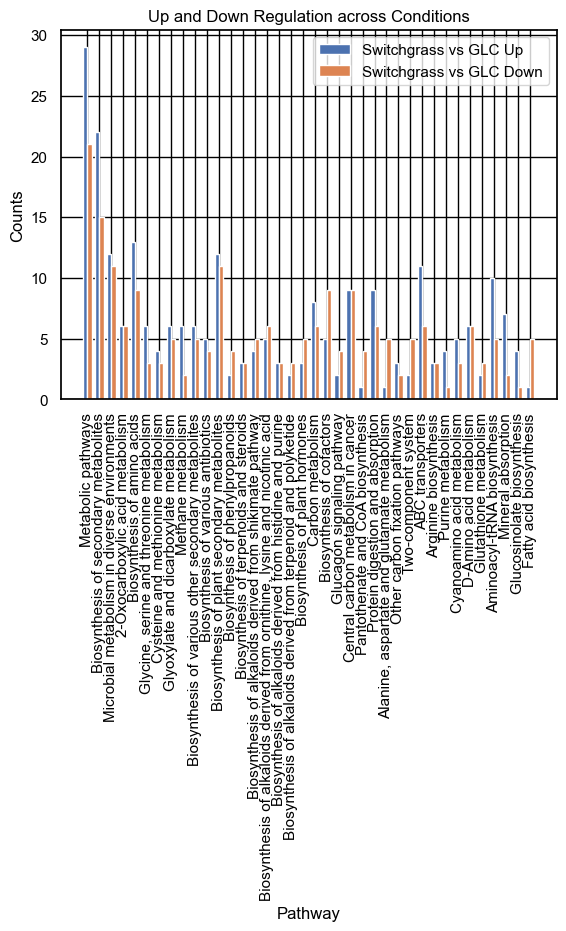

In [23]:

def plot_pathway_comparison(df):
    # Set the plot size
    plt.figure(figsize=(10, 8))

    # Number of groups and bar width
    n_groups = len(df)
    index = np.arange(n_groups)
    bar_width = 0.35

    # Plotting
    fig, ax = plt.subplots()
    bar1 = ax.bar(index, df['switchgrass_vs_glc_up'], bar_width, label='Switchgrass vs GLC Up')
    bar2 = ax.bar(index + bar_width, df['switchgrass_vs_glc_down'], bar_width, label='Switchgrass vs GLC Down')

    # Add labels, title, and legend
    ax.set_xlabel('Pathway')
    ax.set_ylabel('Counts')
    ax.set_title('Up and Down Regulation across Conditions')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df['pathway_name'], rotation=90)
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

plot_pathway_comparison(intracellular_comp_df)

In [ ]:

def get_yarrowia_pathways(compound_id):

    try:
        # Fetch the compound's entry information
        entry = kegg.get(compound_id)
        
        if not entry:
            print(f"No information found for {compound_id}.")
            return []

        # Parse the entry to extract pathways
        pathway_lines = [line for line in entry.split('\n') if line.startswith("PATHWAY")]

        # Filter pathways specific to Yarrowia lipolytica
        pathways = []
        for line in pathway_lines:
            pathway_id = line.split()[1]
            if pathway_id.startswith("yli"):  # Check if the pathway is specific to Yarrowia lipolytica
                pathways.append(line.strip())

        if not pathways:
            print(f"No Yarrowia lipolytica pathways found for {compound_id}.")
            return []

        return pathways

    except Exception as e:
        print(f"Error fetching pathways for {compound_id}: {e}")
        return []

# Example usage
compound_id = 'C01005'
pathways = get_yarrowia_pathways(compound_id)

# Print the pathways
print(f"Pathways for {compound_id} in Yarrowia lipolytica:")
for pathway in pathways:
    print(pathway)


In [ ]:
def get_pathway_df(df):
    # Create a dictionary to store pathway occurrences
    pathway_counts = {}

    # Iterate through the KEGG IDs in the dataframe
    for kegg_id in df['KEGG ID']:
        try:
            # Fetch pathway information for each metabolite
            pathways = kegg.get_pathway_by_gene(kegg_id.split(":")[1], "hsa")  # Using "hsa" as an example organism
            if pathways:
                for pathway in pathways:
                    if pathway in pathway_counts:
                        pathway_counts[pathway] += 1
                    else:
                        pathway_counts[pathway] = 1
        except Exception as e:
            print(f"Error processing {kegg_id}: {e}")

    # Convert the pathway counts to a DataFrame for better visualization
    pathway_df = pd.DataFrame.from_dict(pathway_counts, orient='index', columns=['Count'])
    pathway_df = pathway_df.sort_values(by='Count', ascending=False)

    # Display the top pathways
    print(pathway_df.head(10))

intracellular_df_2 = get_pathway_df(intracellular_df)

intracellular_df_2

### Make list of all metabolite names

In [ ]:
intracellular_df.columns

In [ ]:
all_metabolites = []

for df in [intracellular_df, extracellular_1_df, extracellular_4_df, intracellular_pos_df, intracellular_neg_df, extracellular_pos_df, extracellular_neg_df]:
    all_metabolites.extend(df.columns)

all_metabolites = list(set(all_metabolites))

all_metabolites

In [ ]:
# metabolite_ids = {}

# for metabolite in all_metabolites:
#     result = kegg.find("compound", metabolite)
    
#     if isinstance(result, str) and result.strip():
#         # Extracting the first result which should be the closest match
#         entry = result.split("\n")[0]
#         print(entry)
#         try:
#             compound_id, compound_name = entry.split("\t")
#         except ValueError:
#             compound_id = entry
#         metabolite_ids[metabolite] = compound_id
#     elif isinstance(result, int):
#         print(f"Error retrieving {metabolite}: Bad Request")
#         metabolite_ids[metabolite] = "Request Error"
#     else:
#         print(f'{metabolite} not found')
#         metabolite_ids[metabolite] = "Not Found"

# # Display the results
# for metabolite, compound_id in metabolite_ids.items():
#     print(f"{metabolite}: {compound_id}")

In [ ]:
# # convert the dictionary to a DataFrame and save it to a CSV file
# metabolite_ids_df = pd.DataFrame(metabolite_ids.items(), columns=['Metabolite', 'KEGG ID'])

# metabolite_ids_df.to_csv('../data/kegg_metabolite_ids.csv', index=False)

# # filter out the metabolites that were not found and request errors
# metabolite_ids_df = metabolite_ids_df[metabolite_ids_df['KEGG ID'] != 'Not Found']
# metabolite_ids_df = metabolite_ids_df[metabolite_ids_df['KEGG ID'] != 'Request Error']

# metabolite_ids_df.to_csv('../data/kegg_metabolite_ids_known.csv', index=False)

# metabolite_ids_df

### Add pathways to the KEGG known metabolites file

In [ ]:
# get a list of pathways for a given metabolite
def get_pathways_for_metabolite(metabolite_id):
    entry = kegg.get(metabolite_id)

    lines = entry.split("\n")

    pathway_ids = []

    for line in lines:
        if 'map' in line:
            for word in line.split(' '):
                if 'map' in word:
                    pathway_ids.append(word)


    return pathway_ids

# load the known KEGG metabolite ids
kegg_ids = pd.read_csv('../data/kegg_metabolite_ids_known.csv')

pathways_for_all_metabolites = []

for index, row in kegg_ids.iterrows():
    print(index)
    kegg_id = row['KEGG ID']

    pathways = get_pathways_for_metabolite(kegg_id)

    # make a string of the pathways
    pathways = ';'.join(pathways)

    pathways_for_all_metabolites.append(pathways)


print(pathways_for_all_metabolites)

kegg_ids['KEGG Pathways'] = pathways_for_all_metabolites

kegg_ids

In [ ]:
# save the dataframe to a CSV file
kegg_ids.to_csv('../data/kegg_metabolite_ids_known.csv', index=False)